# **Data Exploration**

In [17]:
df = pd.read_csv('C:\\Users\\AQ\\Downloads\\supply_chain_data.csv')

In [19]:
print(df.head())

  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

In [21]:
print(df.describe())

            Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0

In [23]:
print(df.isnull().sum())

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64


In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [27]:
print(df.drop_duplicates(inplace=True))

None


In [29]:
numeric_columns = df.select_dtypes(include=['number'])
z_scores = (numeric_columns - numeric_columns.mean()) / numeric_columns.std()
print(z_scores)

       Price  Availability  Number of products sold  Revenue generated  \
0   0.652766      0.214681                 1.122556           1.056025   
1  -1.110714      1.515777                 0.905293           0.616520   
2  -1.223773     -0.468394                -1.491177           1.391117   
3   0.375411      0.637537                -1.244288           0.728468   
4  -1.432774     -0.728614                 1.349694          -1.130524   
..       ...           ...                      ...                ...   
95  0.912516      0.539955                 0.694614           0.589246   
96 -0.803362     -0.631031                -0.450951           0.703435   
97 -1.473821      0.247208                -1.313417          -0.514165   
98 -0.953147     -0.175648                 1.487951           1.006244   
99  0.611372     -1.021360                 0.546481           1.247470   

    Stock levels  Lead times  Order quantities  Shipping times  \
0       0.326114   -1.019827          1.74653

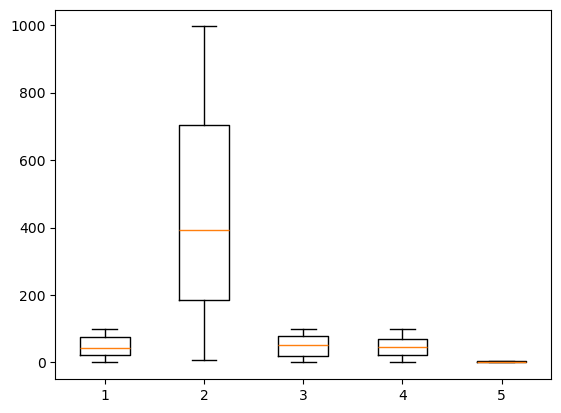

In [31]:
outliers = df[(z_scores > 3) | (z_scores < -3)]
plt.boxplot(df[['Availability','Number of products sold','Price','Manufacturing costs','Defect rates']])
plt.show()

### Category 2 shows significant variability with potential outliers, as indicated by the wide IQR and long whiskers.

In [32]:
df['Inventory Turnover'] = df['Number of products sold'] / df['Stock levels']
print(df)

   Product type    SKU      Price  Availability  Number of products sold  \
0      haircare   SKU0  69.808006            55                      802   
1      skincare   SKU1  14.843523            95                      736   
2      haircare   SKU2  11.319683            34                        8   
3      skincare   SKU3  61.163343            68                       83   
4      skincare   SKU4   4.805496            26                      871   
..          ...    ...        ...           ...                      ...   
95     haircare  SKU95  77.903927            65                      672   
96    cosmetics  SKU96  24.423131            29                      324   
97     haircare  SKU97   3.526111            56                       62   
98     skincare  SKU98  19.754605            43                      913   
99     haircare  SKU99  68.517833            17                      627   

    Revenue generated Customer demographics  Stock levels  Lead times  \
0         8661

# **Analyzing SKUs**
## **Number of sold Skincare products by SKU**

In [ ]:
skincare_data = df[df['Product type'] == 'skincare']
skincare_sku = skincare_data.groupby('SKU')['Number of products sold'].sum().reset_index()
skincare_sku =skincare_sku.sort_values(by='Number of products sold', ascending=False)
plt.figure(figsize=(10, 5))
palette = sns.color_palette("Set2", n_colors=min(40, len(grouped_data)))
ax = sns.barplot(data=skincare_sku, x='SKU', y='Number of products sold',hue='SKU',legend=False, palette=palette)
ax.set_xticks(range(len(grouped_data['SKU'])))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Number of sold Skincare products by SKU')
plt.ylabel('Number of products sold')
plt.tight_layout()
plt.show()

## **Number of sold cosmetics by SKU**

In [ ]:
cosmetics_data = df[df['Product type'] == 'Cosmetics']
cosmetics_sku = cosmetics_data.groupby('SKU')['Number of products sold'].sum().reset_index()
cosmetics_sku =cosmetics_sku.sort_values(by='Number of products sold', ascending=False)
plt.figure(figsize=(10, 5))
palette = sns.color_palette("Set2", n_colors=min(40, len(grouped_data)))
ax.set_xticks(range(len(grouped_data['SKU'])))
ax = sns.barplot(data=skincare_sku, x='SKU', y='Number of products sold',hue='SKU',legend=False, palette=palette)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Number of sold cosmetics products by SKU')
plt.ylabel('Number of products sold')
plt.tight_layout()
plt.show()

## **Number of sold Haircare products by SKU**

In [ ]:
haircare_data = df[df['Product type'] == 'Haircare']
haircare_sku = cosmetics_data.groupby('SKU')['Number of products sold'].sum().reset_index()
haircare_sku =cosmetics_sku.sort_values(by='Number of products sold', ascending=False)
plt.figure(figsize=(10, 5))
palette = sns.color_palette("Set2", n_colors=min(40, len(grouped_data)))
ax.set_xticks(range(len(grouped_data['SKU'])))
ax = sns.barplot(data=skincare_sku, x='SKU', y='Number of products sold',hue='SKU', palette=palette,legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Number of sold haircare products by SKU')
plt.ylabel('Number of products sold')
plt.tight_layout()
plt.show()

## **Inventory Turnover Rate Per Product**

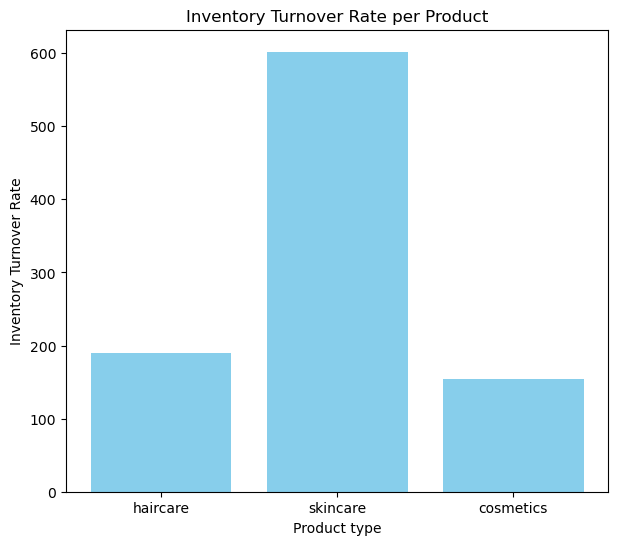

In [33]:
colors='[#333A73','#FBA834','#50C4ED']
plt.figure(figsize=(7, 6))
plt.bar(df['Product type'], df['Inventory Turnover'], color=colors)
plt.title('Inventory Turnover Rate per Product')  
plt.xlabel('Product type')  
plt.ylabel('Inventory Turnover Rate')  
plt.show()

### The analysis indicates that skincare products have the highest inventory levels, reflecting strong demand and consumer interest in skincare solutions.

## **Sales by product type**

In [ ]:
colors=['#86D293','#C1E2A4','#6256CA']
product_sales=df.groupby('Product type')['Number of products sold'].sum().reset_index()
plt.figure(figsize=(8, 5))
plt.pie(product_sales['Number of products sold'],
         labels=product_sales['Product type'],
         autopct='%1.1f%%',startangle=90, colors=colors ,wedgeprops=dict(width=0.5),pctdistance=0.75 )       
plt.title('Sales by product type')
plt.show

### Skincare products are the most preferred products as they are the highest in sales.

## **Total Number of Products per Category**

In [15]:
colors=['#3A6D8C','#6A9AB0','#001F3F']
product_type_counts = df .groupby(['Product type'])['Product type'].count()
product_type_counts.plot(kind='bar', figsize=(8, 6), color=colors)
plt.title('Number of Products by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.show()

NameError: name 'df' is not defined

## **Total Revenue by City**

In [ ]:
colors=['#1B4242','#5C8374','#9EC8B9','#686D76','#507687']
city_sales=df.groupby('Location')['Revenue generated'].sum().reset_index()
plt.figure(figsize=(8,5))
plt.barh(city_sales['Location'],city_sales['Revenue generated'],color=colors)
plt.xlabel('Revenue generated')
plt.ylabel('Location')
plt.title('Total Revenue by City')
plt.tight_layout()
plt.show()

### Mumbai is the city which generats the highest revenue.

## **Distribution of Product Prices by Location and Type**

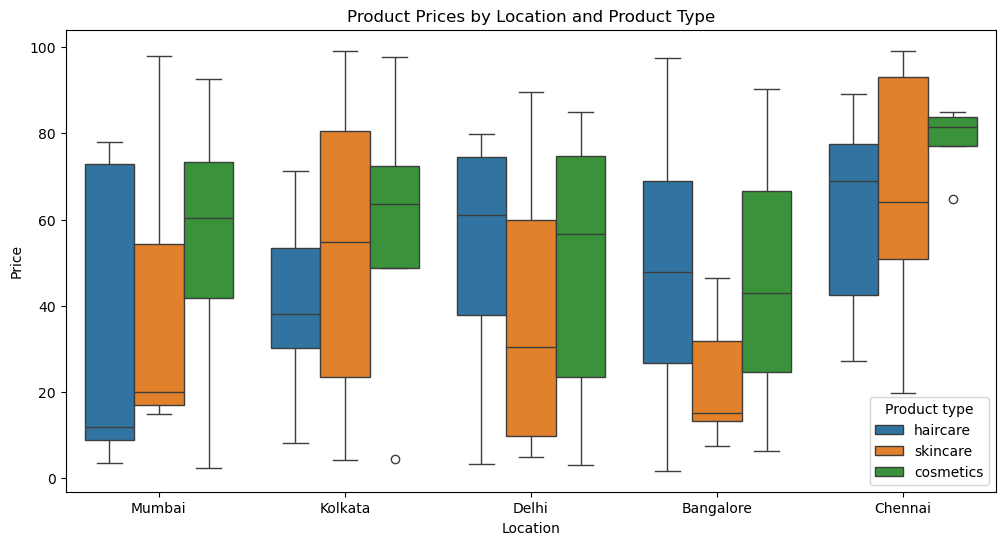

In [37]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(data=df, x='Location', y='Price', hue='Product type')
plt.title('Product Prices by Location and Product Type')
plt.xlabel('Location')
plt.ylabel('Price')
plt.show()

### When it comes to prices, Chennai leads in all the categories.

## **Total Revenue by product type**

In [27]:
colors=['#605678','#8ABFA3','#FFBF61']
revenue_per_product = df.groupby('Product type')['Revenue generated'].sum().reset_index()
plt.figure(figsize=(7, 6))
plt.bar(revenue_per_product['Product type'], revenue_per_product['Revenue generated'], color=colors)
plt.title('Total Revenue per Product type')  
plt.xlabel('Product Type') 
plt.ylabel('Total Revenue')  
plt.show()

NameError: name 'df' is not defined

### Skincare products generate the highest revenue.

## **Total Revenue by shipping carrier**

In [ ]:
colors=['#1B4242','#5C8374','#9EC8B9']
carrier_revenue=df.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
plt.figure(figsize=(8,5))
plt.bar(carrier_revenue['Shipping carriers'],carrier_revenue['Revenue generated'], color=colors)
plt.xlabel('Shipping Carriers')
plt.ylabel('Revenue generated')
plt.title('Total Revenue by Shipping Carriers')
plt.tight_layout()
plt.show()

### The company use 3 Carriers for transportation and carrier B helps the company in generating more revenue.

## **Revenue distribution by customers demographics**

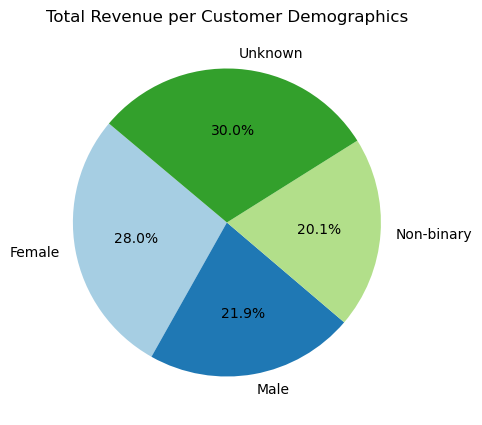

In [41]:
revenue_per_demographics = df.groupby('Customer demographics')['Revenue generated'].sum().reset_index()
plt.figure(figsize=(5, 5))
plt.pie(revenue_per_demographics['Revenue generated'], labels=revenue_per_demographics['Customer demographics'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Total Revenue per Customer Demographics')  
plt.show()

### so 28% of total revenue comes from Femals & 21% comes from Males.

## **Analyzing Lead Time and Manufacturing cost**
### **Average lead time and Average Manufacturing Cost for all the products**

In [ ]:
av_time=df.groupby('Product type')['Lead time'].mean().reset_index()
av_manufacturecost=df.groupby('Product type')['Manufacturing costs'].mean().reset_index()
comb=pd.merge(av_time,av_manufacturecost ,on='Product type')
comb.rename(columns={'Lead time': 'Average Lead Time', 'Manufacturing costs': 'Average Manufacturing Costs'}, inplace=True)
comb   

## **Total Quantity Sold by Transportation Mode**

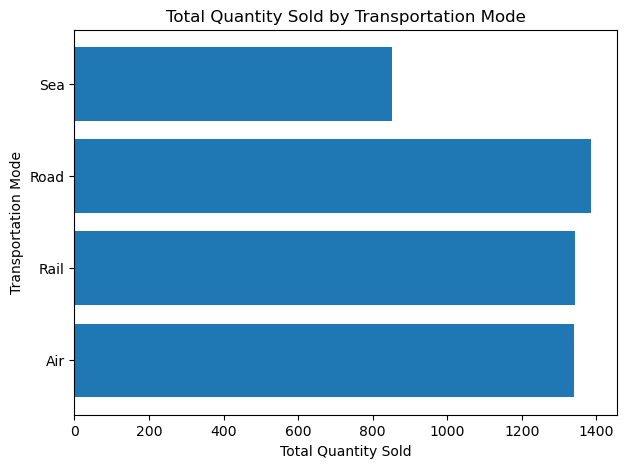

In [43]:
colors=['#333A73','#FBA834','#50C4ED','#387ADF']
usage_per_transportation = df.groupby('Transportation modes')['Order quantities'].sum().reset_index()
plt.figure(figsize=(7, 5))
plt.barh(usage_per_transportation['Transportation modes'], usage_per_transportation['Order quantities'],color=colors )
plt.title('Total Quantity Sold by Transportation Mode') 
plt.xlabel('Total Quantity Sold')  
plt.ylabel('Transportation Mode') 
plt.show()

## **Cost Distribution by Transportation Modes**	

In [ ]:
colors=['#333A73','#FBA834','#50C4ED','#387ADF']
Tcosts=df.groupby('Transportation modes')['Costs'].sum().reset_index()
plt.figure(figsize=(8, 5))
plt.pie(Tcosts['Costs'],labels=Tcosts['Transportation modes'],
        autopct='%1.1f%%',startangle=90 ,colors=colors ,wedgeprops=dict(width=0.5),pctdistance=0.75 )
plt.title('Cost Distribution by Transportation Modes')
plt.show()

### Road and Rail transportation methods are more expensive for the company compared to other forms of transport.

## **Analyzing Defect Rate**

### **Average Defect Rate by Product Type**

In [ ]:
colors=['#1B4242','#5C8374','#9EC8B9']
avg_defect=df.groupby('Product type')['Defect rates'].mean().reset_index()
plt.figure(figsize=(8,5))
plt.bar(avg_defect['Product type'],avg_defect['Defect rates'], color=colors)
plt.xlabel('Product type')
plt.ylabel('Average Defect rates')
plt.title('Average Defect Rate by Product Type')
plt.tight_layout()
plt.show()

### The defect rate for haircare products is the highest one.

### **Defect Rate by Transportation Mode**

In [ ]:
colors=['#141E46','#8DECB4','#D9EDBF','#41B06E']
T_defect=df.groupby('Transportation modes')['Defect rates'].mean().reset_index()
plt.figure(figsize=(8, 6))
plt.pie(T_defect['Defect rates'], 
        labels=None, 
        autopct='%1.1f%%',startangle=90, colors=colors,labeldistance=1.1)
plt.title('Defect Rate by Transportation Mode')
plt.legend(T_defect['Transportation modes'], title="Transportation Modes", loc="center left",bbox_to_anchor=(1.2, 0.5))
plt.show()

### Products delivered by road have the highest chance of being defective, while products delivered by air have the lowest rate of defects.